In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import desimodel.io
import numpy as np

In [51]:
select_subset_sky = False
program = 'bright'
min_ra = 130
max_ra = 190
min_dec = -5
max_dec = 15
start_day = 0
end_day = 40000
batch_cadence = 1

filename = "/global/cfs/cdirs/desi/users/schlafly/surveysim/exposures_nopass7.fits"
all_exposures = Table.read(filename, hdu=1)
all_tiledata = Table.read(filename, hdu=2)
all_tiles = desimodel.io.load_tiles()

all_exposures['MJD_OFFSET'] = all_exposures['MJD'] - all_exposures['MJD'].min()

if program=='dark':
    ii = (all_tiles['PROGRAM']=='DARK') | (all_tiles['PROGRAM']=='GRAY')
    all_tiles = all_tiles[ii]
elif program=='bright':
    ii = (all_tiles['PROGRAM']=='BRIGHT')
    all_tiles = all_tiles[ii]

if select_subset_sky:
    ii = (all_tiles['RA']>min_ra)
    ii &= (all_tiles['RA']<max_ra)
    ii &= (all_tiles['DEC']>min_dec)
    ii &= (all_tiles['DEC']<max_dec)
    tiles = all_tiles[ii]
else:
    tiles = all_tiles.copy()
    
ii = np.isin(all_exposures['TILEID'], tiles['TILEID'])    
exposures = all_exposures[ii]
a, b = np.unique(exposures['TILEID'], return_index=True)
unique_tiles = exposures['TILEID'][np.sort(b)]
unique_dates = exposures['MJD_OFFSET'][np.sort(b)]

i_day  = start_day 
batch_id = 0
while i_day < end_day:
    min_day  = i_day 
    max_day  = min_day + batch_cadence
    ii = (unique_dates>=min_day) & (unique_dates<max_day)
    tiles_in_batch = unique_tiles[ii]
    if len(tiles_in_batch):
        print('batch_{:04d} {}'.format(batch_id, len(tiles_in_batch)))
        batch_id += 1
    i_day += batch_cadence


batch_0000 21
batch_0001 38
batch_0002 26
batch_0003 31
batch_0004 18
batch_0005 6
batch_0006 35
batch_0007 1
batch_0008 19
batch_0009 24
batch_0010 28
batch_0011 10
batch_0012 5
batch_0013 7
batch_0014 45
batch_0015 35
batch_0016 12
batch_0017 2
batch_0018 13
batch_0019 40
batch_0020 17
batch_0021 23
batch_0022 18
batch_0023 6
batch_0024 38
batch_0025 30
batch_0026 25
batch_0027 20
batch_0028 12
batch_0029 17
batch_0030 7
batch_0031 37
batch_0032 21
batch_0033 17
batch_0034 19
batch_0035 27
batch_0036 8
batch_0037 12
batch_0038 20
batch_0039 18
batch_0040 26
batch_0041 22
batch_0042 22
batch_0043 4
batch_0044 22
batch_0045 23
batch_0046 34
batch_0047 35
batch_0048 30
batch_0049 31
batch_0050 22
batch_0051 7
batch_0052 1
batch_0053 27
batch_0054 25
batch_0055 27
batch_0056 3
batch_0057 29
batch_0058 12
batch_0059 5
batch_0060 13
batch_0061 16
batch_0062 29
batch_0063 23
batch_0064 8
batch_0065 1
batch_0066 12
batch_0067 25
batch_0068 25
batch_0069 21
batch_0070 29
batch_0071 27
batch_0

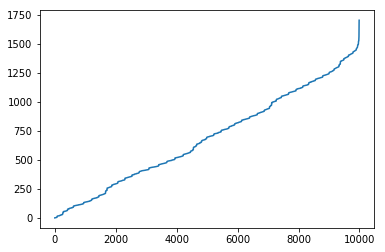

In [42]:
plt.plot(unique_dates)

In [43]:
ii = np.isin(tiles['TILEID'], unique_tiles)
print(np.count_nonzero(ii), len(unique_tiles))

9990 9990


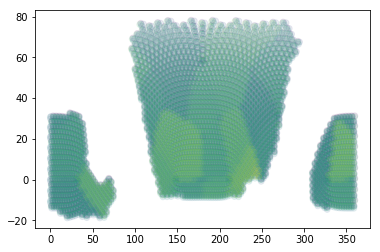

In [46]:

plt.scatter(tiles['RA'], tiles['DEC'], c=unique_dates, alpha=0.1)


In [48]:
len(tiles)

9990